## Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En se basant sur le tableau de toutes les correlations, on décide de prendre aléatoirement 2 caractéristiques qui ont une correlation de valeur absolue strictement supérieure à 0.5, ici : "PTS" et "BLK', respectivement les points marqués et les bloquages.

In [3]:
#  loading nbaPlayersAllTimesAgilityData.csv
df = pd.read_csv('nbaPlayersAllTimesStatsData.csv')

#  remove ' ' from column names /!\ invisible characters
df.columns = df.columns.str.replace(' ', ' ')

# remove space in playerName
df['PLAYER'] = df['PLAYER'].str.replace(' ', '')

# remove duplicates
df = df.drop_duplicates(subset=['PLAYER'], keep='first')

# replace every value equal to '-' with the mean of the other value in the columns
df = df.replace('-', np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.fillna(df.mean(numeric_only=True))

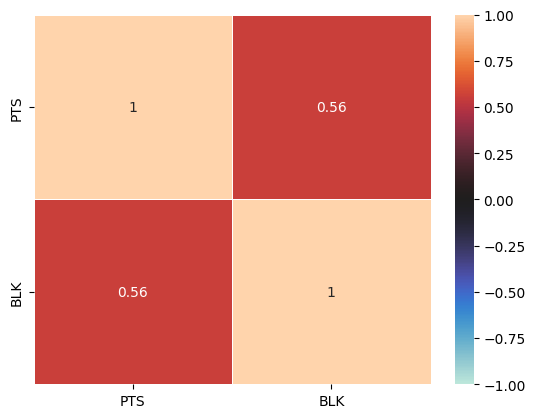

In [4]:
df1 = df[['PTS', 'BLK']]

corr = df1.corr() 
# heatmap of correlation
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center= 0,linewidths=.5)
plt.show()

A priori, en voyant qu'il y a une correlation significative entre ces deux caractéristiques, on peut instinctivement et naïvement émettre une relation d'implication en se disant que "Plus un joueur bloque de ballons, plus il marquera de points" ou inversement.

On s'attend donc en affichant un graphique des points en fonction des bloquages, qu'il y ait une tendance qui suive une droite affine      F(x) = a*x + b, avec b proche de 0.

Autrement dit, que plus un joueur bloque de ballons (plus le point est haut dans le graphique), plus il marquera de points (plus le point sera à droite dans le graphique).

Voyons cela.

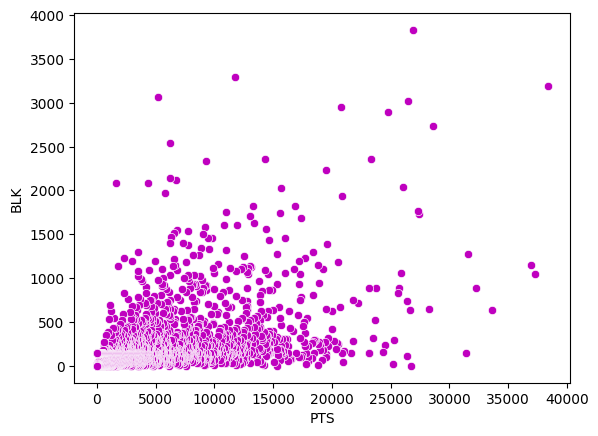

In [5]:
# PLOTTING 
sns.scatterplot(x="PTS", y="BLK", data=df1,
                  color="m")
plt.show()


Dans ce graphique, on voit très bien que l'accumulation de points se fait en bas à gauche, et on constate même que, en règle générale : 
- même si un joueur bloque beaucoup de balles, il peut mettre très peu de points
- et inversement, même si un joueur marque beaucoup de points, il peut faire peu de blocage.

Nous n'observons pas une tendance affine, par conséquent, nous venons d'avoir une démonstration que notre première intuition, qui était "vu que la correlation est supérieur à 0.5, alors on devrait perçevoir une tendance montrant que plus on bloque de balles, plus on marque de points", était fausse.

Pour conclure, bien qu'il y ait une correlation entre le nombre de blocage d'un joueur et les points qu'il marque, il y a beaucoup d'autres facteurs qui rentrent en jeu et qui ne permettent pas d'établir une relation d'implication entre ces 2 caractéristiques. Par exemple le temps de jeu impact ces deux valeurs, et donc, on ne peut pas conclure que plus un joueur bloque de balles, plus il marquera de points. Par contre si un joueur joue plus de temps de jeu il a plus de chance de marquer et aussi de bloquer.

Je pense que c'est une bonne chose, car cela veut dire que le basket est un sport où il y a beaucoup de facteurs qui rentrent en jeu, et qui rendent le sport très intéressant.